### DBScan - Credit_Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
base = pd.read_csv('credit_card_clients.csv', header=1)

In [2]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + \
 base['BILL_AMT6']

In [3]:
X = base.iloc[:,[1,25]].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# Alterar o min_samples e eps para redução de registros no grupo 0
dbscan = DBSCAN(eps = 0.37, min_samples = 3)
previsoes = dbscan.fit_predict(X)
unicos, quantidade = np.unique(previsoes, return_counts = True)

In [7]:
quantidade

array([   30, 29940,    19,     4,     3,     4], dtype=int64)

In [13]:
print(f'Foram gerados {len(unicos)} grupos.')
print(unicos)

Foram gerados 6 grupos.
[-1  0  1  2  3  4]


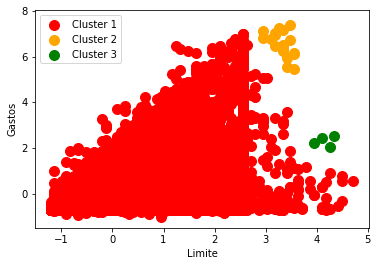

In [8]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()

In [9]:
lista_clientes = np.column_stack((base, previsoes))
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]

In [10]:
lista_clientes

array([[  14807,  340000,       2, ...,       0, 2970723,      -1],
       [   8881,  660000,       2, ...,       0, 2219105,      -1],
       [    919,  240000,       1, ...,       0, 2440564,      -1],
       ...,
       [  25127,  740000,       1, ...,       0, 1805310,       4],
       [  23092,  710000,       2, ...,       0, 1717475,       4],
       [  13187,  750000,       2, ...,       0, 1630127,       4]],
      dtype=int64)